In [167]:
import pandas as pd
import numpy as np

project_root='C:/Users/n1564120/Downloads'
sep2021=pd.read_csv(project_root+'/nb092021.csv')
oct2021=pd.read_csv(project_root+'/nb102021.csv')
nov2021=pd.read_csv(project_root+'/nb112021.csv')
dec2021=pd.read_csv(project_root+'/nb122021.csv')
jan2022=pd.read_csv(project_root+'/nb012022.csv')
feb2022=pd.read_csv(project_root+'/nb022022.csv')
mar2022=pd.read_csv(project_root+'/nb032022.csv')
apr2022=pd.read_csv(project_root+'/nb042022.csv')
may2022=pd.read_csv(project_root+'/nb052022.csv')
jun2022=pd.read_csv(project_root+'/nb062022.csv')



In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130105 entries, 0 to 16891
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   TRANSACTION YEAR                         86625 non-null  object 
 1   TRANSACTION MONTH                        86625 non-null  float64
 2   Transaction Date                         16358 non-null  object 
 3   Unnamed: 3                               12824 non-null  object 
 4   Topholding / Parent Name                 16358 non-null  object 
 5   Unnamed: 5                               13505 non-null  object 
 6   Contractor                               54956 non-null  object 
 7   Bond_ID                                  86625 non-null  object 
 8   Underwriter Name                         35395 non-null  object 
 9   Bond Inception Date                      86438 non-null  object 
 10  Expiration Date                          8643

Append Data Together

In [168]:
df = sep2021.append([oct2021, nov2021, dec2021, jan2022, feb2022, mar2022, apr2022, may2022, jun2022])


### To create an aggregate exposure amount. Create a subset of data that eliminates any rows of the duplicate exposure by bond number and transaction month


In [178]:
septmax=oct2021.sort_values(by="Bond Amount Original Currency").drop_duplicates(subset=["Bond_ID"], keep="last")
octmormax=oct2021.sort_values(by="Bond Amount Original Currency").drop_duplicates(subset=["Bond_ID"], keep="last")
novmormax=nov2021.sort_values(by="Bond Ammount Original Currency").drop_duplicates(subset=["Bond_ID"], keep="last")
decmormax=dec2021.sort_values(by="Bond Ammount Original Currency").drop_duplicates(subset=["Bond_ID"], keep="last")
janmormax=jan2022.sort_values(by="Bond Ammount Original Currency").drop_duplicates(subset=["Bond_ID"], keep="last")
febmormax=feb2022.sort_values(by="Bond Ammount Original Currency").drop_duplicates(subset=["Bond_ID"], keep="last")
marmormax=mar2022.sort_values(by="Bond Ammount Original Currency").drop_duplicates(subset=["Bond_ID"], keep="last")
aprmormax=apr2022.sort_values(by="Bond Ammount Original Currency").drop_duplicates(subset=["Bond_ID"], keep="last")
maymormax=may2022.sort_values(by="Bond Ammount Original Currency").drop_duplicates(subset=["Bond_ID"], keep="last")
junmormax=jun2022.sort_values(by="Bond Ammount Original Currency").drop_duplicates(subset=["Bond_ID"], keep="last")

### Create a unique index identifier so that we can input only one bond amount original if that bond transaction is the first distinct entry by transaction fiscal and bond id

In [163]:
columbusgrfo=pd.read_csv(project_root+'/columbusgrfo.csv')
columbusgrfo2=columbusgrfo.drop_duplicates(subset=['PolicyNumber', 'TransactionFiscalPeriod'])

In [161]:
columbusgrfo.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74855 entries, 0 to 74854
Data columns (total 128 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   Region                                        object 
 1   Branch                                        object 
 2   LineOfBusinessCode                            float64
 3   LineOfBusinessDescription                     float64
 4   NewRenewal                                    float64
 5   PolicyTitle                                   float64
 6   LeadFollow                                    float64
 7   InsuredName                                   object 
 8   ProjectName                                   float64
 9   PolicyNumber                                  object 
 10  MasterStatus                                  float64
 11  UnderwriterName                               float64
 12  InceptionYear                                 float64
 13  

In [173]:
with pd.ExcelWriter('Nationale Borg Exposure Mapping.xlsx') as writer:
    df.to_excel(writer, sheet_name='NB')  

In [139]:
columbusgrfo.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74855 entries, 0 to 74854
Data columns (total 127 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   Region                                        object 
 1   Branch                                        object 
 2   LineOfBusinessCode                            float64
 3   LineOfBusinessDescription                     float64
 4   NewRenewal                                    float64
 5   PolicyTitle                                   float64
 6   LeadFollow                                    float64
 7   InsuredName                                   object 
 8   ProjectName                                   float64
 9   PolicyNumber                                  object 
 10  MasterStatus                                  float64
 11  UnderwriterName                               float64
 12  InceptionYear                                 float64
 13  

In [179]:
dfmorexposure=septmax.append([octmormax, novmormax, decmormax, janmormax, febmormax, marmormax, aprmormax, maymormax, junmormax])

### Examine Columns-Look for Total Count of Entries 86625, compared to total count of the 2 Columns of Bond Amt Original =86410.
### There are 238 transactions that are fee based. Imputed EUR to not incude any blank

In [180]:
dfmorexposure["TRANSACTION MONTH"].unique()

array([10., 11., 12.,  1.,  2., nan,  3.,  4.,  5.,  6.])

In [181]:
with pd.ExcelWriter('ColumbusDataAppendMORExposure1.xlsx') as writer:
    dfmorexposure.to_excel(writer, sheet_name='NB')  

### Examine Exposure Variance Across Book Months

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '10.0'),
  Text(8, 0, '11.0'),
  Text(9, 0, '12.0')])

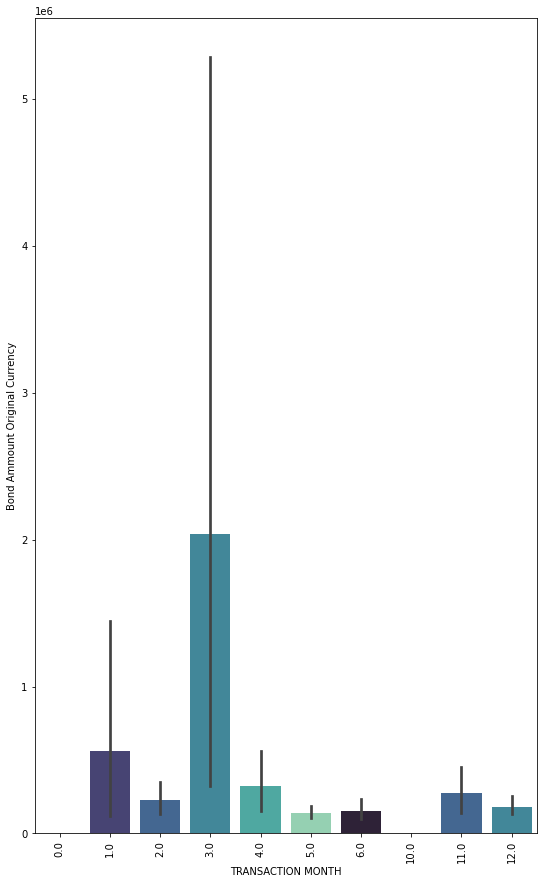

In [49]:
df = df.fillna(0)

plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
chart=plt.figure(figsize=(9, 15))
sns.barplot(x="TRANSACTION MONTH", y="Bond Ammount Original Currency", data=df2, palette=sns.color_palette("mako"))
plt.xticks( rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '10.0'),
  Text(8, 0, '11.0'),
  Text(9, 0, '12.0')])

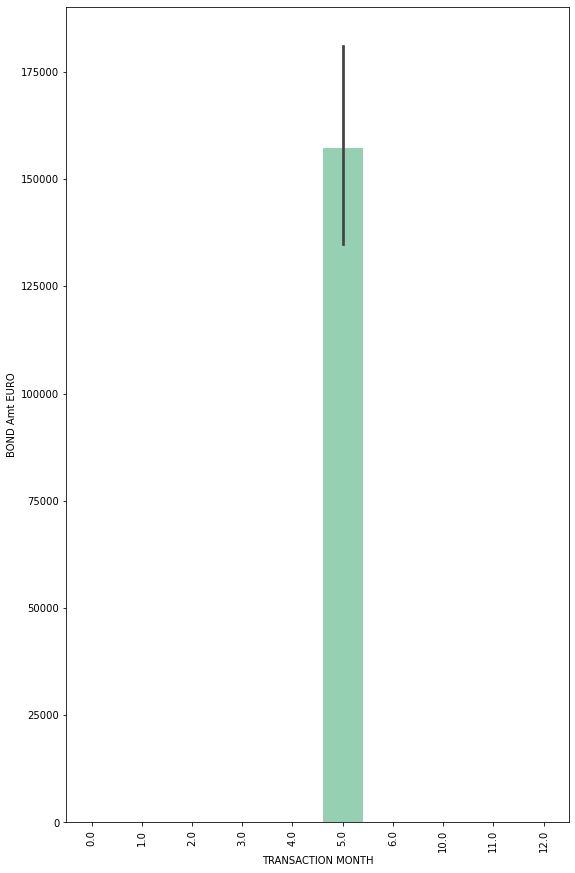

In [50]:
df = df.fillna(0)

plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
chart=plt.figure(figsize=(9, 15))
sns.barplot(x="TRANSACTION MONTH", y="BOND Amt EURO", data=df2, palette=sns.color_palette("mako"))
plt.xticks( rotation='vertical')

### Discover Which Months Bond Amount Euro-Calculated by Joost, replaced Bond Amount Original

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '10.0'),
  Text(8, 0, '11.0'),
  Text(9, 0, '12.0')])

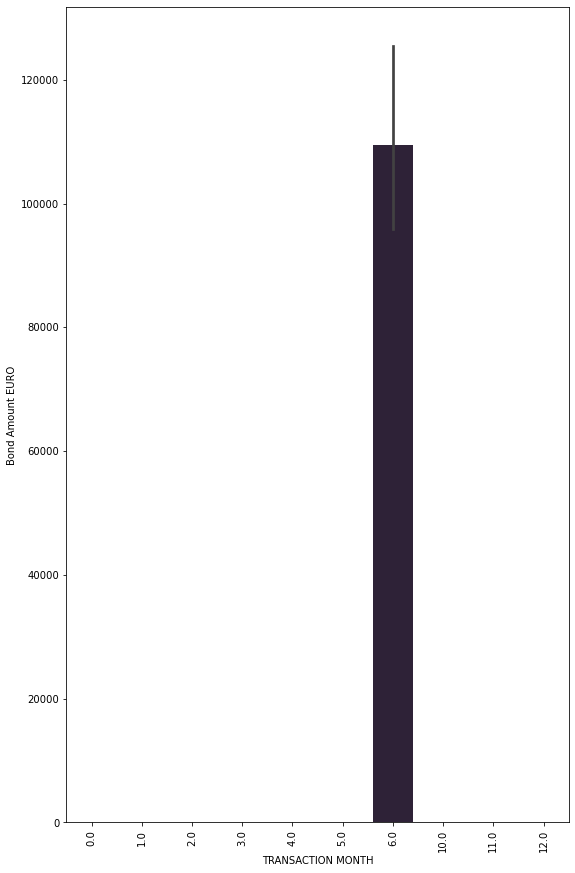

In [53]:
df = df.fillna(0)

plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
chart=plt.figure(figsize=(9, 15))
sns.barplot(x="TRANSACTION MONTH", y="Bond Amount EURO", data=df2, palette=sns.color_palette("mako"))
plt.xticks( rotation='vertical')

### Examine the Rows of Data with missing Exposure Amounts. Knowing that Original Currency Code is missing from Fee-Only Related Transactions, find all Bonds Missing an Original Amount ALSO Missing Currency Code

In [69]:
df3.fillna(0)
null=df3[df3['Bond Ammount Original Currency'].isnull()]
null

,Unnamed: 0,TRANSACTION YEAR,TRANSACTION MONTH,Transaction Date,Unnamed: 3,Topholding / Parent Name,Unnamed: 5,Contractor,Bond_ID,Underwriter Name,...,Analyzed Type of Bond,Broker Name.1,Liu Limit Accouting,Contractor.1,LIU Limit Accounting,Principal Name,Bond Amount EURO Calc,BOND Amt EURO,Bond Amount EURO,Bond Type
0,0,"2,021",10.0,"44,470",#VALUE!,Nationale Waarborg,#VALUE!,NaN,GT_011374_AG_58037,Nationale Waarborg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"2,021",10.0,"44,470",Waarborg,Nationale Waarborg,#VALUE!,NaN,GT_011374_AG_58038,Nationale Waarborg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"2,021",10.0,"44,470",Waarborg,Nationale Waarborg,#VALUE!,NaN,GT_011374_AG_58039,Nationale Waarborg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"2,021",10.0,"44,470",Waarborg,Nationale Waarborg,#VALUE!,NaN,GT_011374_AG_58040,Nationale Waarborg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"2,021",10.0,"44,470",Waarborg,Nationale Waarborg,#VALUE!,NaN,GT_011374_AG_58041,Nationale Waarborg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113204,16887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113205,16888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113206,16889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113207,16890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Examing below, we have the potential for 28 transactions labelled "adjustment" to be fee-only transactions where we do not 
need exposure. This means that of the 215 transactions we initially identified as missing a Bond Amount original and Needing to be subbed out for Bond Amount Exposure, we have the potential to not need 28 of these missing values to be imputed. This isn't enough to not build logic into the system to use Bond Amount Euro and make changes to the Exchange rate accordingly, special for these specific transactions. 

In [153]:
null.groupby('TRANSACTION MONTH')['Bond Ammount Original Currency', 'Original Currency'].nunique()

<ipython-input-153-75f302b1d6c7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  null.groupby('TRANSACTION MONTH')['Bond Ammount Original Currency', 'Original Currency'].nunique()


,Bond Ammount Original Currency,Original Currency
TRANSACTION MONTH,,
1.0,0,0
3.0,0,1
6.0,0,0
10.0,0,11
11.0,0,0
12.0,0,0


In [74]:
df3.fillna(0)
null2=df3[df3['Bond Amount Original Currency'].isnull()]
null2

,Unnamed: 0,TRANSACTION YEAR,TRANSACTION MONTH,Transaction Date,Unnamed: 3,Topholding / Parent Name,Unnamed: 5,Contractor,Bond_ID,Underwriter Name,...,Analyzed Type of Bond,Broker Name.1,Liu Limit Accouting,Contractor.1,LIU Limit Accounting,Principal Name,Bond Amount EURO Calc,BOND Amt EURO,Bond Amount EURO,Bond Type
16358,0,2021,11.0,NaN,NaN,NaN,NaN,"00148279_Fruytier Group, Purchase, Sales and S...",GT_012696_AD_00109,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16359,1,2021,11.0,NaN,NaN,NaN,NaN,"00148279_Fruytier Group, Purchase, Sales and S...",GT_012696_AD_00109,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16360,2,2021,11.0,NaN,NaN,NaN,NaN,00073013_DHL International N.V. S.A.,GT_012636_AB_00022,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16361,3,2021,11.0,NaN,NaN,NaN,NaN,00147640_Bioterra N.V.,GT_012636_AB_00022,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16362,4,2021,11.0,NaN,NaN,NaN,NaN,"00148279_Fruytier Group, Purchase, Sales and S...",GT_012696_AD_00108,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113204,16887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113205,16888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113206,16889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113207,16890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
null2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96851 entries, 16358 to 113208
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               96851 non-null  int64  
 1   TRANSACTION YEAR                         53371 non-null  object 
 2   TRANSACTION MONTH                        53371 non-null  float64
 3   Transaction Date                         0 non-null      object 
 4   Unnamed: 3                               0 non-null      object 
 5   Topholding / Parent Name                 0 non-null      object 
 6   Unnamed: 5                               0 non-null      object 
 7   Contractor                               28928 non-null  object 
 8   Bond_ID                                  53371 non-null  object 
 9   Underwriter Name                         28169 non-null  object 
 10  Bond Inception Date                      

In [82]:
null2.groupby('Transaction Type')['Gross Written premium Original Currency'].nunique()

Transaction Type
Adjustment      0
New Business    0
Renewal         0
Name: Gross Written premium Original Currency, dtype: int64